In [ ]:
pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Include libraries to be used
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats


from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pds/Diabetes Study/diabetes.csv')

FileNotFoundError: ignored

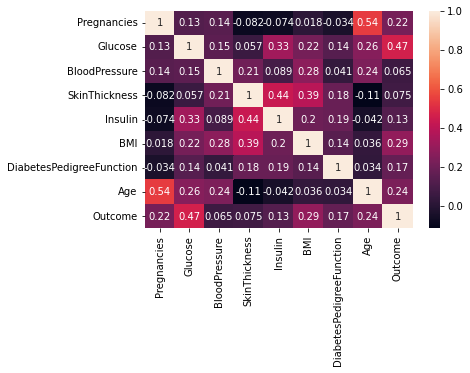

In [ ]:
ax = sns.heatmap(df.corr(), annot=True)
sns.set(rc={'figure.figsize':(15,10)})


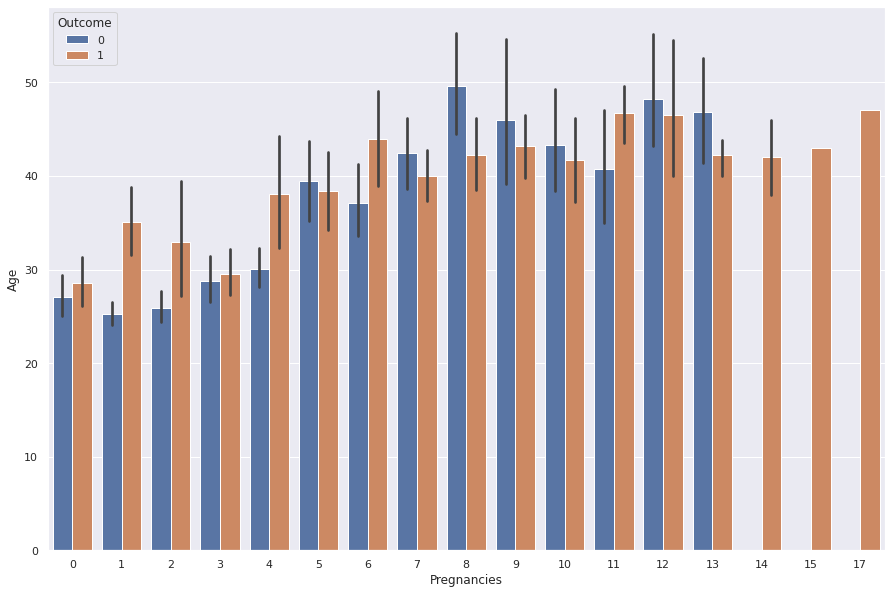

In [ ]:
sns.barplot(data=df, x="Pregnancies", y="Age",hue='Outcome')

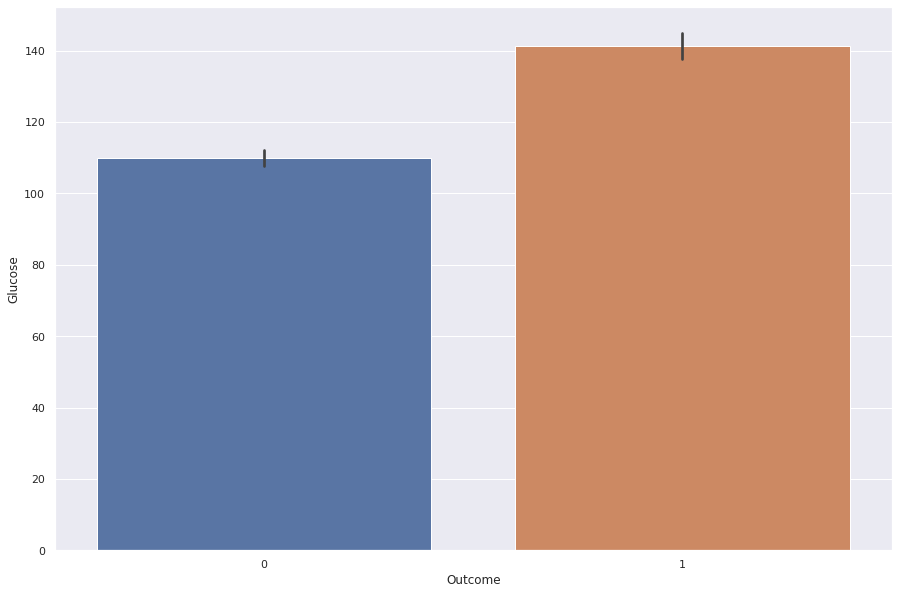

In [ ]:
sns.barplot(data=df, x="Outcome", y="Glucose")

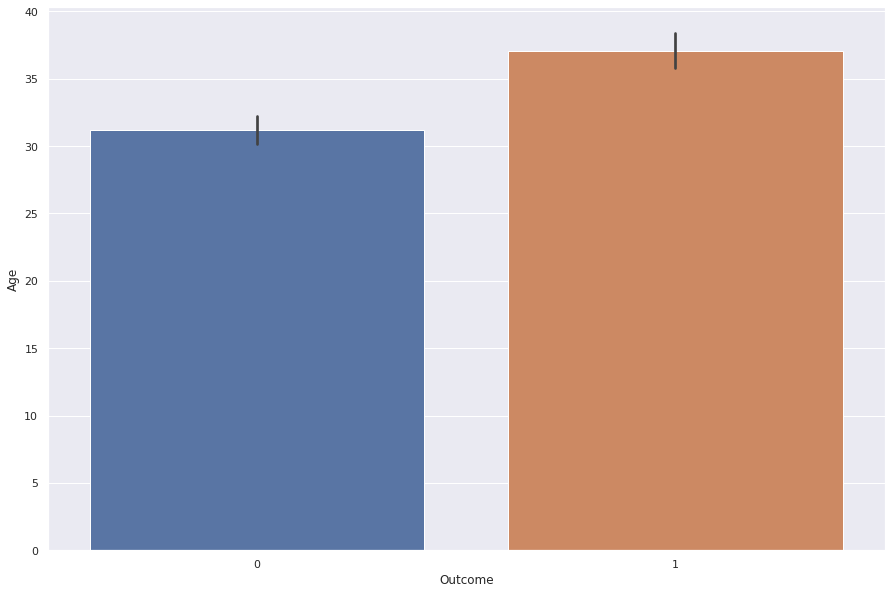

In [ ]:
sns.barplot(data=df, x="Outcome", y="Age")

PCA Analysis

**Tasks to be done**
1. Clean the data
2. EDA 
3. First test model

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target=df['Outcome']
data=df.drop('Outcome',axis=1)

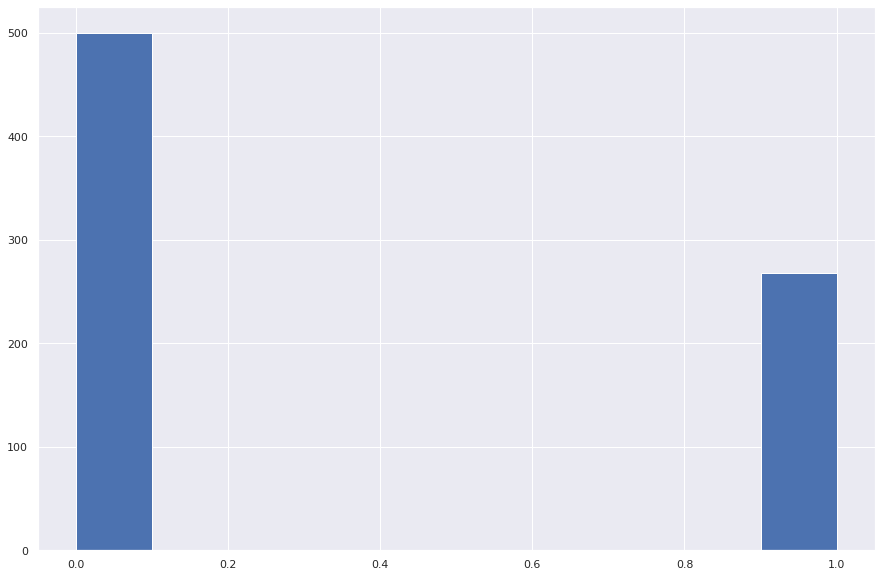

In [ ]:
target.hist()

In [ ]:
df1=data.copy()

Scalling

In [ ]:
scaler=StandardScaler()
scaler.fit(df1)

df1 = pd.DataFrame(scaler.transform(df1),index=df1.index, columns=df1.columns)

In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size=0.2, random_state=0)


Model selection

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,0.936914,0.910918,0.459827,0.530902,0.401154,0.407084,0.664800,1.766346
118,0.046014,-0.747831,-0.470732,0.154533,-0.692891,-0.481351,-0.087210,-0.956462
247,-1.141852,1.380375,1.080200,0.781814,5.211479,2.577403,-0.135532,-0.871374
157,-0.844885,-0.372265,-0.677523,0.029077,0.479300,-0.862109,1.090636,-0.871374
468,1.233880,-0.027996,-3.572597,-1.288212,-0.692891,-0.252897,-0.872441,0.404942
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
192,0.936914,1.192592,-0.160546,-1.288212,-0.692891,-0.202129,-0.268417,0.234767
629,0.046014,-0.841722,-0.212243,0.091805,-0.692891,-0.925569,-0.978145,-1.041549
559,2.124780,-1.123396,0.253036,-1.288212,-0.692891,-0.240205,-0.519087,0.149679


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8246753246753247


Decision Tree classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, dtc_pred))

Accuracy: 0.7467532467532467


Random Forest classifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, rfc_pred))

Accuracy: 0.8116883116883117


xgboost classifier

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
gb_clf.score(X_test, y_test)

0.8051948051948052

In [ ]:
gb_pred = gb_clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, gb_pred))

Accuracy: 0.8051948051948052


Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [ ]:
svc_pred = svc_clf.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, svc_pred))

Accuracy: 0.7922077922077922


lgbm classfier

In [ ]:
import lightgbm as lgb

lg_clf = lgb.LGBMClassifier()
lg_clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
lg_pred = lg_clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, lg_pred))

Accuracy: 0.8116883116883117


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 0.7317 - accuracy: 0.4593 - val_loss: 0.6662 - val_accuracy: 0.6104
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.7248 - val_loss: 0.5769 - val_accuracy: 0.7597
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5575 - accuracy: 0.7590 - val_loss: 0.5136 - val_accuracy: 0.7792
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.7638 - val_loss: 0.4750 - val_accuracy: 0.7727
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4869 - accuracy: 0.7622 - val_loss: 0.4551 - val_accuracy: 0.7727
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4700 - accuracy: 0.7638 - val_loss: 0.4436 - val_accuracy: 0.7792
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.7704 - val_loss: 0.4379 - val_accuracy: 0.7857
Epoch 8/10
20/20 [=

In [ ]:
k_pred = model.predict(X_test)
k_pred = (k_pred > 0.5)

5/5 [==============================] - 0s 3ms/step


In [ ]:
print("Accuracy:", accuracy_score(y_test, k_pred))


Accuracy: 0.7922077922077922


Hyperparameter tuning for random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

In [ ]:
hp_clf = RandomForestClassifier()
grid_search = GridSearchCV(hp_clf, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 40}


In [ ]:
hp_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hp_pred))

Accuracy: 0.7857142857142857


Hyper parameter tuning for logistic regression

Feature engineering

In [ ]:
def bmi_categories(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Normal'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(lambda x: bmi_categories(x))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Obese


In [ ]:
def age_categories(age):
    if age < 35:
        return 'Young'
    elif age >= 35 and age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

df['Age_Category'] = df['Age'].apply(lambda x: age_categories(x))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Category
0,6,148,72,35,0,33.6,0.627,50,1,Obese,Middle-aged
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Young
2,8,183,64,0,0,23.3,0.672,32,1,Normal,Young
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Young
4,0,137,40,35,168,43.1,2.288,33,1,Obese,Young


In [ ]:
def pregnancy_categories(pregnancies):
    if pregnancies == 0:
        return 'Nulliparous'
    elif pregnancies == 1:
        return 'Primiparous'
    else:
        return 'Multiparous'

df['Pregnancy_Category'] = df['Pregnancies'].apply(lambda x: pregnancy_categories(x))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Category,Pregnancy_Category
0,6,148,72,35,0,33.6,0.627,50,1,Obese,Middle-aged,Multiparous
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Young,Primiparous
2,8,183,64,0,0,23.3,0.672,32,1,Normal,Young,Multiparous
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Young,Primiparous
4,0,137,40,35,168,43.1,2.288,33,1,Obese,Young,Nulliparous


In [ ]:
def diabetes_history(pedigree):
    if pedigree < 0.5:
        return 'Low Risk'
    elif pedigree >= 0.5 and pedigree < 1:
        return 'Moderate Risk'
    else:
        return 'High Risk'

df['Diabetes_History'] = df['DiabetesPedigreeFunction'].apply(lambda x: diabetes_history(x))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Category,Pregnancy_Category,Diabetes_History
0,6,148,72,35,0,33.6,0.627,50,1,Obese,Middle-aged,Multiparous,Moderate Risk
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Young,Primiparous,Low Risk
2,8,183,64,0,0,23.3,0.672,32,1,Normal,Young,Multiparous,Moderate Risk
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Young,Primiparous,Low Risk
4,0,137,40,35,168,43.1,2.288,33,1,Obese,Young,Nulliparous,High Risk


In [ ]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns_to_drop, axis=1)

df = drop_columns(df, ['Pregnancies', 'BMI', 'DiabetesPedigreeFunction','Age'])

In [ ]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,Outcome,BMI_Category,Age_Category,Pregnancy_Category,Diabetes_History
0,148,72,35,0,1,Obese,Middle-aged,Multiparous,Moderate Risk
1,85,66,29,0,0,Overweight,Young,Primiparous,Low Risk
2,183,64,0,0,1,Normal,Young,Multiparous,Moderate Risk
3,89,66,23,94,0,Overweight,Young,Primiparous,Low Risk
4,137,40,35,168,1,Obese,Young,Nulliparous,High Risk


In [ ]:
def rename_columns(df, columns_map):
    return df.rename(columns=columns_map)

df = rename_columns(df, {'BMI_Category': 'BMI', 'Age_Category': 'Age','Pregnancy_Category': 'Pregnancy','Diabetes_History': 'History'})

In [ ]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,Outcome,BMI,Age,Pregnancy,History
0,148,72,35,0,1,Obese,Middle-aged,Multiparous,Moderate Risk
1,85,66,29,0,0,Overweight,Young,Primiparous,Low Risk
2,183,64,0,0,1,Normal,Young,Multiparous,Moderate Risk
3,89,66,23,94,0,Overweight,Young,Primiparous,Low Risk
4,137,40,35,168,1,Obese,Young,Nulliparous,High Risk


In [ ]:
df_encoded = pd.get_dummies(df, columns=['BMI', 'Age', 'Pregnancy','History'])
df_encoded.head()

,Glucose,BloodPressure,SkinThickness,Insulin,Outcome,BMI_Normal,BMI_Obese,BMI_Overweight,BMI_Underweight,Age_Middle-aged,Age_Senior,Age_Young,Pregnancy_Multiparous,Pregnancy_Nulliparous,Pregnancy_Primiparous,History_High Risk,History_Low Risk,History_Moderate Risk
0,148,72,35,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
1,85,66,29,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
2,183,64,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1
3,89,66,23,94,0,0,0,1,0,0,0,1,0,0,1,0,1,0
4,137,40,35,168,1,0,1,0,0,0,0,1,0,1,0,1,0,0


In [ ]:
target1=df_encoded['Outcome']
data1=df_encoded.drop('Outcome',axis=1)

In [ ]:
data1.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI_Normal,BMI_Obese,BMI_Overweight,BMI_Underweight,Age_Middle-aged,Age_Senior,Age_Young,Pregnancy_Multiparous,Pregnancy_Nulliparous,Pregnancy_Primiparous,History_High Risk,History_Low Risk,History_Moderate Risk
0,148,72,35,0,0,1,0,0,1,0,0,1,0,0,0,0,1
1,85,66,29,0,0,0,1,0,0,0,1,0,0,1,0,1,0
2,183,64,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3,89,66,23,94,0,0,1,0,0,0,1,0,0,1,0,1,0
4,137,40,35,168,0,1,0,0,0,0,1,0,1,0,1,0,0


In [ ]:
target1.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
scaler=StandardScaler()
scaler.fit(data1)

data1 = pd.DataFrame(scaler.transform(data1),index=data1.index, columns=data1.columns)

In [ ]:
data1.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI_Normal,BMI_Obese,BMI_Overweight,BMI_Underweight,Age_Middle-aged,Age_Senior,Age_Young,Pregnancy_Multiparous,Pregnancy_Nulliparous,Pregnancy_Primiparous,History_High Risk,History_Low Risk,History_Moderate Risk
0,0.848324,0.149641,0.907270,-0.692891,-0.391348,0.791908,-0.551276,-0.141139,1.448024,-0.208514,-1.320173,0.686487,-0.411035,-0.461812,-0.266702,-1.331376,1.548622
1,-1.123396,-0.160546,0.530902,-0.692891,-0.391348,-1.262773,1.813974,-0.141139,-0.690596,-0.208514,0.757476,-1.456692,-0.411035,2.165384,-0.266702,0.751102,-0.645735
2,1.943724,-0.263941,-1.288212,-0.692891,2.555271,-1.262773,-0.551276,-0.141139,-0.690596,-0.208514,0.757476,0.686487,-0.411035,-0.461812,-0.266702,-1.331376,1.548622
3,-0.998208,-0.160546,0.154533,0.123302,-0.391348,-1.262773,1.813974,-0.141139,-0.690596,-0.208514,0.757476,-1.456692,-0.411035,2.165384,-0.266702,0.751102,-0.645735
4,0.504055,-1.504687,0.907270,0.765836,-0.391348,0.791908,-0.551276,-0.141139,-0.690596,-0.208514,0.757476,-1.456692,2.432883,-0.461812,3.749510,-1.331376,-0.645735


In [ ]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(data1, target1, test_size=0.2, random_state=0)

In [ ]:
clf_fe = LogisticRegression()
clf_fe.fit(Xt_train, yt_train)
fe_pred = clf_fe.predict(Xt_test)
print("Accuracy:", accuracy_score(yt_test, fe_pred))

Accuracy: 0.8051948051948052


In [ ]:
fe_rfc = RandomForestClassifier()
fe_rfc.fit(Xt_train, yt_train)
rfc_pred = fe_rfc.predict(Xt_test)
print("Accuracy:", accuracy_score(yt_test, rfc_pred))

Accuracy: 0.7857142857142857


In [ ]:
data1
target1


In [ ]:
Xu_train, Xu_test, yu_train, yu_test = train_test_split(data1, target1, test_size=0.2, random_state=0)

In [ ]:
fe_rfc = RandomForestClassifier()
fe_rfc.fit(Xu_train, yu_train)
rfc_pred = fe_rfc.predict(Xu_test)
print("Accuracy:", accuracy_score(yu_test, rfc_pred))

Accuracy: 0.7857142857142857
